<a href="https://colab.research.google.com/github/rhmdftrianto/DATMIN/blob/main/027_Rahmad_Fitrianto_Tugas_1_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Forcasting (peramalan)**

Peramalan mengacu pada proses menganalisis dan menjelaskan keadaan masa depan mengenai setiap operasi yang dilakukan. Proses ini mempertimbangkan masa lalu dan informasi saat ini dalam upaya untuk memprediksi fakta untuk peristiwa masa depan. Singkatnya, peramalan mengacu pada proses melihat ke depan, dan menentukan tren masa depan dan dampaknya terhadap organisasi.

# **2. Regresi (Regression)**

 Metode yang satu ini sedikit mirip dengan klasifikasi data mining. Bedanya, regresi merupakan metode yang bertujuan untuk mencari pola nilai numerik, bukan kelas. Hasil dari metode regression adalah sebuah fungsi sebagai penentu hasil yang didasarkan nilai dari input.

# **3. Kluster (Clustering)**

mengidentifikasi pengelompokkan hal-hal berdasarkan karakter-karakter yang sudah diketahui, seperti mengelompokkan pelanggan dalam segment-segment yang berbeda berdasarkan demographis dan perilaku pembelian di masa lalu.

# **4. Klasifikasi (Clasification)**

Klasifikasi juga bisa diartikan sebagai proses mengategorisasikan suatu hal menjadi beberapa kelompok berdasarkan persamaan dan perbedaannya. Contohnya klasifikasi sampah berdasarkan jenis bahannya terbagi menjadi sampah organik dan sampah anorganik.

# **1. Data Mining - Analisis Asosiasi (Association)**

Analisis asosiasi atau association rule mining adalah teknik data mining untuk menemukan aturan assosiatif antara suatu kombinasi item (Mengetahui hubungan antara satu atribut dengan yang lainnya). Contoh aturan assosiatif dari analisa pembelian di suatu pasar swalayan contohnya adalah dapat diketahuinya berapa besar kemungkinan seorang pelanggan membeli roti bersamaan dengan susu. Dengan pengetahuan tersebut pemilik pasar swalayan dapat mengatur penempatan barangnya atau merancang kampanye pemasaran dengan memakai kupon diskon untuk kombinasi barang tertentu.


Ruang Lingkup : **Product Purchases** <br>
**Algoritma apriori** : Digunakan agar komputer dapat mempelajari aturan asosiasi, mencari pola hubungan antar satu atau lebih item dalam suatu dataset. <br>
**Permasalahan** yang ingin di selesaikan adalah membantu pihak retail dalam menentukan product bundling dan product placement dari data transaksi yang hendak digunakan. 

## Tahapan data mining

1. **Data Selection** -> Pemilihan (seleksi) data dari sekumpulan data operasional perlu dilakukan sebelum tahap penggalian informasi. Data hasil seleksi yang digunakan untuk proses data mining, disimpan dalam suatu berkas, terpisah dari basis data operasional. <br>
2. **Data Pre-processing** -> Merupakan proses mengubah data mentah atau biasa dikenal dengan raw data yang dikumpulkan dari berbagai sumber menjadi informasi yang lebih bersih dan bisa digunakan untuk pengolahan selanjutnya.
> *2.1 Data Cleansing* -> Data cleaning mencakup proses membuang duplikasi data, memeriksa data yang inkonsisten, dan memperbaiki kesalahan yang ada pada data.<br> *2.2 Data Transformation* -> Merupakan proses transformasi pada data yang telah dipilih. Lebih lanjut dari itu, proses transformasi data merupakan proses mengubah data kedalam format operasional tertentu, mengkonversi tipe data, melakukan beberapa perhitungan, penyaringan data yang tidak relevan, dan meringkasnya (tergantung pada jenis atau pola informasi yang akan dicari dalam basis data). <br>
3. **Data mining** -> Data mining adalah proses mencari pola atau informasi menarik dalam data terpilih dengan menggunakan teknik atau metode tertentu. Teknik, metode, atau algoritma dalam data mining sangat bervariasi. Pemilihan metode atau algoritma yang tepat sangat bergantung pada tujuan dan proses data mining secara keseluruhan. <br>
4. **Interpretation / evalution** -> Pola informasi yang dihasilkan dari proses data mining perlu ditampilkan dalam bentuk yang mudah dimengerti oleh pihak yang berkepentingan. Tahap ini mencakup pemeriksaan apakah pola atau informasi yang ditemukan bertentangan dengan fakta atau hipotesis yang ada sebelumnya.

## Question

Mengidentifikasi produk-produk yang sering dibeli secara bersamaan oleh customer kemudian membantu pihak retail dalam menentukan product bundling dan product placement dari data transaksi yang digunakan. (Market Basket Analitcs) <br>

In [290]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [291]:
pip install mlxtend  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [292]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [294]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/Tugas1/data_retail2.xlsx')

In [295]:
df

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2021-12-09 12:50:00,22,MALANG,K0336,8888166603240,22613,KG CHOCO SHORT CAKE 225G,BISKUIT,12,...,12680.0,KPRI DIAN HUSADA (DINAS KESEHATAN),JLN SIMPANG LA SUCIPTO NO 45,MALANG,JAWA TIMUR,INDONESIA,45,Koperasi,220109,PT. KOTAK AGRO SUBUR
541905,581587,2021-12-09 12:50:00,22,MALANG,K1923,8888166993044,22899,KG CHOCO WAY FINGER 33G,BISKUIT,6,...,12680.0,ASSALAM,JLN TELUK BAYUR NO 59,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541906,581587,2021-12-09 12:50:00,22,MALANG,K0290,8888166336841,23254,KG CISSY 120G CRACKER,BISKUIT,4,...,12680.0,RAHMA TK,JLN SANAN NO. 1A/14 (BLKG LAPAS),MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR
541907,581587,2021-12-09 12:50:00,22,MALANG,K3270,8991102023986,23255,KIDDO JUNIOR,PASTA & S-GIGI,4,...,12680.0,KARUNIA,PERUM SUKUN PONDOK INDAH N-9,MALANG,JAWA TIMUR,INDONESIA,32,Toko Kelontong,220109,PT. KOTAK AGRO SUBUR


In [296]:
# Buat dataset dengan label target 'BANDUNG'
df2 = df[df["BRANCHNAME_SPLR"]=="BANDUNG"]

In [297]:
df_bd = pd.DataFrame(df2)
df_bd

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
8,536366,2020-12-01 08:28:00,5,BANDUNG,20008,8992780020038,22632,2TANG AIR MINERAL 600ML,MINUMAN,6,...,17850.0,ADE,CITALANG,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA
12,536367,2020-12-01 08:34:00,5,BANDUNG,70002,89686811025,22749,7UP 330ML,SUSU,8,...,13047.0,TK KOKOM,GG FURNITURE. CIBUNGUR,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA
13,536367,2020-12-01 08:34:00,5,BANDUNG,80002,8882730008301,22310,888 CALIFORNIA NEW ORANGE,PARFUM,6,...,13047.0,TK RIDWAN,JL SADANG,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA
235,C536391,2020-12-01 10:24:00,5,BANDUNG,A2658,8992855888235,22556,AGAR2 BOLA DUNIA RED 7G,MANISAN,-12,...,17548.0,KOP DUNLOP (SUMI RUBBER),KAWASAN INDOTAISEI BLOK H,PURWAKARTA,JAWA BARAT,INDONESIA,45,Koperasi,50312,PT. JAYA WIJAYA
278,536396,2020-12-01 10:51:00,5,BANDUNG,A0353,8999918182781,85123A,AIM BISC 120G LEMON SANDW,BISKUIT,6,...,17850.0,KOPKAR ASAHIMAS C1,KAWASAN INDUSTRI INDOTAISEI,PURWAKARTA,JAWA BARAT,INDONESIA,45,Koperasi,50312,PT. JAYA WIJAYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338487,566558,2021-09-13 11:51:00,5,BANDUNG,P0118,4902430041454,22721,PAMPERS BABY DRY M-5,PAMPERS,1,...,15311.0,FARELL CELL,SIDODADI,SUBANG,JAWA BARAT,INDONESIA,32,Toko Kelontong,50313,CV. SEJALAN SELALU
338488,566558,2021-09-13 11:51:00,5,BANDUNG,P0117,4902430041478,22362,PAMPERS BABY DRY M-42,PAMPERS,2,...,15311.0,TOKO KIYA,KP GARUNG KORANJI,SUBANG,JAWA BARAT,INDONESIA,32,Toko Kelontong,50313,CV. SEJALAN SELALU
338489,566558,2021-09-13 11:51:00,5,BANDUNG,P0115,4902430041461,23403,PAMPERS BABY DRY M-22,PAMPERS,1,...,15311.0,WARUNG BU EKEN,CIWARENG,PURWAKARTA,JAWA BARAT,INDONESIA,91,End User,50312,PT. JAYA WIJAYA
338490,566558,2021-09-13 11:51:00,5,BANDUNG,P0095,8993472100083,21928,PALMSUIKER 250G,BUMBU,4,...,15311.0,TK ANUGRAH,PATOKBEUSI,SUBANG,JAWA BARAT,INDONESIA,32,Toko Kelontong,50313,CV. SEJALAN SELALU


In [298]:
df_bd.dtypes

InvoiceNo                      object
InvoiceDate            datetime64[ns]
BRANCH_SPLR                     int64
BRANCHNAME_SPLR                object
warehouseProductsID            object
BARCODEID                       int64
StockCode                      object
PRODUCT                        object
PRODUCT_CATEGORY               object
Quantity                        int64
UnitPrice                     float64
UnitPriceRupiah               float64
oldCUSTID                      object
CustomerID                    float64
CUSTNAME                       object
ADDRESS                        object
KOTA                           object
PROVINSI                       object
NEGARA                         object
CHANNELID_SPLR                  int64
CHANNELNAME_SPLR               object
SUBDISTID                       int64
SUBDIST_NAME                   object
dtype: object

In [299]:
df_bd.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,12556.0,1.255600e+04,12556.000000,12556.000000,1.255600e+04,9769.000000,12556.000000,12556.000000
mean,5.0,8.074755e+12,9.954842,5.977480,8.547797e+04,15280.170437,34.696082,50312.732717
std,0.0,2.339282e+12,32.069858,171.273505,2.449211e+06,1760.845632,10.873386,0.442559
min,5.0,6.000000e+00,-682.000000,0.000000,0.000000e+00,12347.000000,14.000000,50312.000000
25%,5.0,8.888107e+12,1.000000,1.250000,1.787500e+04,13798.000000,32.000000,50312.000000
50%,5.0,8.992933e+12,4.000000,2.100000,3.003000e+04,15058.000000,32.000000,50313.000000
75%,5.0,8.998103e+12,12.000000,4.130000,5.905900e+04,16910.000000,32.000000,50313.000000
max,5.0,9.988777e+12,1200.000000,13541.330000,1.936410e+08,18283.000000,92.000000,50313.000000


In [300]:
pd.unique(df_bd.BRANCHNAME_SPLR)

array(['BANDUNG'], dtype=object)

In [301]:
df_bd.nunique()

InvoiceNo              1607
InvoiceDate            1514
BRANCH_SPLR               1
BRANCHNAME_SPLR           1
warehouseProductsID    2974
BARCODEID              2973
StockCode              2472
PRODUCT                2971
PRODUCT_CATEGORY         51
Quantity                130
UnitPrice               237
UnitPriceRupiah         237
oldCUSTID              1397
CustomerID              906
CUSTNAME               1229
ADDRESS                 616
KOTA                      3
PROVINSI                  2
NEGARA                    1
CHANNELID_SPLR           17
CHANNELNAME_SPLR         17
SUBDISTID                 2
SUBDIST_NAME              2
dtype: int64

## 2. Data Pre-processing


### 2.1 Data Cleansing

In [302]:
df_bd.head(3)

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
8,536366,2020-12-01 08:28:00,5,BANDUNG,20008,8992780020038,22632,2TANG AIR MINERAL 600ML,MINUMAN,6,...,17850.0,ADE,CITALANG,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA
12,536367,2020-12-01 08:34:00,5,BANDUNG,70002,89686811025,22749,7UP 330ML,SUSU,8,...,13047.0,TK KOKOM,GG FURNITURE. CIBUNGUR,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA
13,536367,2020-12-01 08:34:00,5,BANDUNG,80002,8882730008301,22310,888 CALIFORNIA NEW ORANGE,PARFUM,6,...,13047.0,TK RIDWAN,JL SADANG,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA


In [303]:
# Mengganti kolom PERIODE menjadi tipe data datetime
df_bd['InvoiceDate'] = pd.to_datetime(df_bd['InvoiceDate'])

In [304]:
# Clean up spaces in product description, product category and remove any rows that don't have a valid invoice
df_bd['PRODUCT'] = df_bd['PRODUCT'].str.strip()
df_bd['PRODUCT_CATEGORY'] = df_bd['PRODUCT_CATEGORY'].str.strip()

df_bd.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [305]:
# menghapus variabel inoviceNO yang diawali dengan huruf C pada invoice numbernya
df_bd['InvoiceNo'] = df_bd['InvoiceNo'].astype('str')
df_bd = df_bd[~(df_bd['InvoiceNo'].str[0] == 'C')]

### 2.2 Data Transformation

In [306]:
basket = (df[df['BRANCHNAME_SPLR'] =="BANDUNG"].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('InvoiceNo'))
basket.head()

PRODUCT_CATEGORY,KACANG TANAH,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
536396,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
536401,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [307]:
# Show a subset of columns
basket.iloc[:,[0,1,2,3,4,5,6,7]].head()

PRODUCT_CATEGORY,KACANG TANAH,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT
InvoiceNo,,,,,,,,
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536396,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
536398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536401,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [308]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head(5)

PRODUCT_CATEGORY,KACANG TANAH,ALAT LISTRIK,ALAT RUMAH TANGGA,BEER,BERAS,BISKUIT,BUMBU,COKELAT,DETERGEN,DIET FOOD,...,SEMIR SEPATU,SLAI/JAM,SNACK,STATIONERY,SUSU,SYRUP,TANDAS,TEH & KOPI,TEPUNG,TISSUE
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
536396,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
536401,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Data Mining
### Data mining dapat dikenal juga dengan istilah data exploration

In [309]:
# Build up the frequent items, the rules, and model

frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.186061,(ALAT RUMAH TANGGA)
1,0.205352,(BISKUIT)
2,0.159303,(DETERGEN)
3,0.260112,(KOSMETIK)
4,0.220286,(MINUMAN)
5,0.149969,(OBATAN)
6,0.210952,(PARFUM)
7,0.135657,(PERMEN)
8,0.222775,(SABUN & SAMPHOO)
9,0.149969,(SNACK)


Dimana perintah yang di gunakan adalah apriori, dengan data dari basket_sets dengan minimum nilai support 0.1/ 10%.

In [310]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1.head() # 1280 rows × 9 columns

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MINUMAN),(KOSMETIK),0.220286,0.260112,0.100187,0.454802,1.748486,0.042888,1.357100
1,(KOSMETIK),(MINUMAN),0.260112,0.220286,0.100187,0.385167,1.748486,0.042888,1.268173
2,(KOSMETIK),(PARFUM),0.260112,0.210952,0.102054,0.392344,1.859875,0.047182,1.298512
3,(PARFUM),(KOSMETIK),0.210952,0.260112,0.102054,0.483776,1.859875,0.047182,1.433269
4,(SABUN & SAMPHOO),(KOSMETIK),0.222775,0.260112,0.112010,0.502793,1.932988,0.054063,1.488089


In [311]:
result1 = rules1[(rules1['lift'] >= 1) & 
               (rules1['confidence'] >= 0.3)]

apr_result = result1.sort_values(by='confidence', ascending=False)
apr_result.head(20) # 64 rows × 9 columns

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(SABUN & SAMPHOO),(KOSMETIK),0.222775,0.260112,0.112010,0.502793,1.932988,0.054063,1.488089
3,(PARFUM),(KOSMETIK),0.210952,0.260112,0.102054,0.483776,1.859875,0.047182,1.433269
0,(MINUMAN),(KOSMETIK),0.220286,0.260112,0.100187,0.454802,1.748486,0.042888,1.357100
5,(KOSMETIK),(SABUN & SAMPHOO),0.260112,0.222775,0.112010,0.430622,1.932988,0.054063,1.365042
2,(KOSMETIK),(PARFUM),0.260112,0.210952,0.102054,0.392344,1.859875,0.047182,1.298512
1,(KOSMETIK),(MINUMAN),0.260112,0.220286,0.100187,0.385167,1.748486,0.042888,1.268173


Melakukan filter untuk nilai lift ratio lebih dari sama dengan 1 dengan tingkat confidence minimal 0.3 (lebih dari sama dengan 30%)

Lift Ratio adalah suatu ukuran (parameter) untuk mengetahui kekuatan aturan asosiasi (association rule) yang telah terbentuk dari nilai support

In [312]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [313]:
result2 = rules2[ (rules2['lift'] >= 1) & 
                (rules2['confidence'] >= 0.3) ]

best_result = result2.sort_values(by='confidence', ascending=False)
best_result.head() # 17 rows × 9 columns

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction



If Antecedent Then Concequent

## 4. Interpretation



**Additional Note:**
Produk atau barang yang menjadi kombinasi produk pertama untuk frekuensi yang paling banyak adalah **kosmetik, sabun dan sampho, parfum, minuman**.

In [314]:
# check barang kedua untuk kombinasi barang pertama
# pairing kombinasi dari pembelian produk pertama yang paling banyak untuk barang kedua adalah

apr_result['consequents'].value_counts()

(KOSMETIK)           3
(SABUN & SAMPHOO)    1
(PARFUM)             1
(MINUMAN)            1
Name: consequents, dtype: int64

# **2. Customer Life Time Value**

In [315]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/Tugas1/data_retail2.xlsx')

df.head()

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536365,2020-12-01 08:26:00,13,SAMARINDA,10001,8992753282401,85123A,123 BENDERA COKLAT 300G,SUSU,6,...,17850.0,DUA PUTRI SLAMET RIYADI,JL. SLAMET RIYADI,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
1,536365,2020-12-01 08:26:00,13,SAMARINDA,20020,8999909192034,71053,2.3.4 FILTER,ROKOK,6,...,17850.0,SANURI,JL. M. SAID,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
2,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20021,8999909007147,84406B,234 KERETEK,ROKOK,8,...,17850.0,EMI MBAK,PS. TALUN NO.63,MAGELANG,JAWA TENGAH,INDONESIA,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
3,536365,2020-12-01 08:26:00,13,SAMARINDA,20018,8999909172234,84029G,234 KERETEK 12,ROKOK,6,...,17850.0,RISKA CELL ADAM MALIK,JL. ADAM MALIK,SAMARINDA,KALIMANTAN TIMUR,INDONESIA,32,Toko Kelontong,130113,CV. EKA PUTRA
4,536365,2020-12-01 08:26:00,19,YOGYAKARTA,20019,8999909005860,84029E,234 KERETEK 16,ROKOK,6,...,17850.0,ABADI MART,JL.GROWONG - PUCUNG REJO MUNTILAN.,MAGELANG,JAWA TENGAH,INDONESIA,42,Mini Market,190105,PT. KTRI DISTRIBUSI


In [316]:
# Buat dataset dengan label target 'BANDUNG'
df2 = df[df["BRANCHNAME_SPLR"]=="BANDUNG"]

In [317]:
df_bd = pd.DataFrame(df2)
df_bd

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
8,536366,2020-12-01 08:28:00,5,BANDUNG,20008,8992780020038,22632,2TANG AIR MINERAL 600ML,MINUMAN,6,...,17850.0,ADE,CITALANG,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA
12,536367,2020-12-01 08:34:00,5,BANDUNG,70002,89686811025,22749,7UP 330ML,SUSU,8,...,13047.0,TK KOKOM,GG FURNITURE. CIBUNGUR,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA
13,536367,2020-12-01 08:34:00,5,BANDUNG,80002,8882730008301,22310,888 CALIFORNIA NEW ORANGE,PARFUM,6,...,13047.0,TK RIDWAN,JL SADANG,PURWAKARTA,JAWA BARAT,INDONESIA,32,Toko Kelontong,50312,PT. JAYA WIJAYA
235,C536391,2020-12-01 10:24:00,5,BANDUNG,A2658,8992855888235,22556,AGAR2 BOLA DUNIA RED 7G,MANISAN,-12,...,17548.0,KOP DUNLOP (SUMI RUBBER),KAWASAN INDOTAISEI BLOK H,PURWAKARTA,JAWA BARAT,INDONESIA,45,Koperasi,50312,PT. JAYA WIJAYA
278,536396,2020-12-01 10:51:00,5,BANDUNG,A0353,8999918182781,85123A,AIM BISC 120G LEMON SANDW,BISKUIT,6,...,17850.0,KOPKAR ASAHIMAS C1,KAWASAN INDUSTRI INDOTAISEI,PURWAKARTA,JAWA BARAT,INDONESIA,45,Koperasi,50312,PT. JAYA WIJAYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338487,566558,2021-09-13 11:51:00,5,BANDUNG,P0118,4902430041454,22721,PAMPERS BABY DRY M-5,PAMPERS,1,...,15311.0,FARELL CELL,SIDODADI,SUBANG,JAWA BARAT,INDONESIA,32,Toko Kelontong,50313,CV. SEJALAN SELALU
338488,566558,2021-09-13 11:51:00,5,BANDUNG,P0117,4902430041478,22362,PAMPERS BABY DRY M-42,PAMPERS,2,...,15311.0,TOKO KIYA,KP GARUNG KORANJI,SUBANG,JAWA BARAT,INDONESIA,32,Toko Kelontong,50313,CV. SEJALAN SELALU
338489,566558,2021-09-13 11:51:00,5,BANDUNG,P0115,4902430041461,23403,PAMPERS BABY DRY M-22,PAMPERS,1,...,15311.0,WARUNG BU EKEN,CIWARENG,PURWAKARTA,JAWA BARAT,INDONESIA,91,End User,50312,PT. JAYA WIJAYA
338490,566558,2021-09-13 11:51:00,5,BANDUNG,P0095,8993472100083,21928,PALMSUIKER 250G,BUMBU,4,...,15311.0,TK ANUGRAH,PATOKBEUSI,SUBANG,JAWA BARAT,INDONESIA,32,Toko Kelontong,50313,CV. SEJALAN SELALU


In [318]:
product_df_bd = df_bd.value_counts()
product_df_bd = pd.DataFrame(product_df_bd)
product_df_bd

0
InvoiceNo InvoiceDate         BRANCH_SPLR BRANCHNAME_SPLR warehouseProductsID BARCODEID     StockCode PRODUCT                             PRODUCT_CATEGORY Quantity UnitPrice UnitPriceRupiah oldCUSTID CustomerID CUSTNAME                         ADDRESS          KOTA       PROVINSI   NEGARA    CHANNELID_SPLR CHANNELNAME_SPLR SUBDISTID SUBDIST_NAME         
536366    2020-12-01 08:28:00 5           BANDUNG         20008               8992780020038 22632     2TANG AIR MINERAL 600ML             MINUMAN           6       1.85      26455.0         1510009   17850.0    ADE                              CITALANG         PURWAKARTA JAWA BARAT INDONESIA 32             Toko Kelontong   50312     PT. JAYA WIJAYA     1
566278    2021-09-11 14:05:00 5           BANDUNG         R0405               8996001307656 85176     ROMA BISC COCOA PUFF 325GR          BISKUIT           12      0.85      12155.0         1520033   13614.0    FAJAR                            BINONG TENGAH    SUBANG     JAWA BARAT INDONESIA 32             Toko Kelontong   50313     CV. SEJALAN SELALU  1
566277    2021-09-11 14:01:00 5           BANDUNG         R1128               9555057609368 23247     ROYAL CHOCO 15X50S HAZELNUT         COKELAT           6       2.89      41327.0         1522242   16796.0    ABAH APUD                        MANYETI          SUBANG     JAWA BARAT INDONESIA 32             Toko Kelontong   50313     CV. SEJALAN SELALU  1
                                                          R1129               9555057609375 23234     ROYAL CHOCO 15GX50S MILK            COKELAT           6       2.89      41327.0         1522251   16796.0    DIKI                             KALIJATI         SUBANG     JAWA BARAT INDONESIA 32             Toko Kelontong   50313     CV. SEJALAN SELALU  1
                                                          R1135               9556469207524 21232     RIA SIRUP 500ML MANDARIN ORANGE     MINUMAN           12      1.25      17875.0         1520650   16796.0    PESANTREN MARIFATUS SALAM IKHWAN CIBODAS KALIJATI SUBANG     JAWA BARAT INDONESIA 45             Koperasi         50313     CV. SEJALAN SELALU  1
...                                                                                                                                                                                                                                                                                                                                                               ..
551035    2021-04-26 11:34:00 5           BANDUNG         A1437               8993560066109 21218     AIR WICK CLICK SPR 15ML CITRUS      PARFUM            6       3.75      53625.0         1520424   15065.0    KANTIN BRI IBU MEY MEY           JALAN OTISTA     SUBANG     JAWA BARAT INDONESIA 39             Kantin           50313     CV. SEJALAN SELALU  1
                                                          A1456               6921921213420 21408     ASBAK ROKOK KERAMIK 4 INCH 682 (JD) PECAH BELAH       3       4.25      60775.0         1520646   15065.0    TK OMAH                          PURI SUBANG      SUBANG     JAWA BARAT INDONESIA 32             Toko Kelontong   50313     CV. SEJALAN SELALU  1
                                                          A1580               3147758332940 22622     ATTRACTION EDT 100ML LANCOME        PARFUM            2       9.95      142285.0        1510350   15065.0    MIRA                             PASIR NANGKA     PURWAKARTA JAWA BARAT INDONESIA 32             Toko Kelontong   50312     PT. JAYA WIJAYA     1
                                                          A1639               8999921921537 21889     AGENDA PRAMUKA RAARAA AP-07         STATIONERY        12      1.25      17875.0         1522360   15065.0    FATIMAH                          BINONG           SUBANG     JAWA BARAT INDONESIA 32             Toko Kelontong   50313     CV. SEJALAN SELALU  1
C566490   2021-09-13 10:20:00 5           BANDUNG         S5738        

In [319]:
df_bd.shape

(12556, 23)

In [320]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12556 entries, 8 to 338491
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            12556 non-null  object        
 1   InvoiceDate          12556 non-null  datetime64[ns]
 2   BRANCH_SPLR          12556 non-null  int64         
 3   BRANCHNAME_SPLR      12556 non-null  object        
 4   warehouseProductsID  12556 non-null  object        
 5   BARCODEID            12556 non-null  int64         
 6   StockCode            12556 non-null  object        
 7   PRODUCT              12556 non-null  object        
 8   PRODUCT_CATEGORY     12556 non-null  object        
 9   Quantity             12556 non-null  int64         
 10  UnitPrice            12556 non-null  float64       
 11  UnitPriceRupiah      12556 non-null  float64       
 12  oldCUSTID            12556 non-null  object        
 13  CustomerID           9769 non-

In [321]:
# Mengganti kolom PERIODE menjadi tipe data datetime
df_bd['InvoiceDate'] = pd.to_datetime(df_bd['InvoiceDate'])

In [322]:
# melihat range/rentang waktu dari data yang digunakan
print('Date Range: %s to %s' % (df_bd['InvoiceDate'].min(), df_bd['InvoiceDate'].max()))

Date Range: 2020-12-01 08:28:00 to 2021-09-13 11:51:00


In [323]:
df_bd['Sales']=df_bd['Quantity']*df_bd['UnitPriceRupiah']

In [324]:
df_bd['Sales']

8         158730.0
12        429000.0
13        141570.0
235      -283140.0
278       218790.0
            ...   
338487     70785.0
338488     84370.0
338489     53625.0
338490    118976.0
338491    148720.0
Name: Sales, Length: 12556, dtype: float64

In [325]:
# mendapat order summary dataset yang menunjukkan total penjualan yang dilakukan per faktur pelanggan (customer invoice)
orders_df_bd = df_bd.groupby(['CustomerID','InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [326]:
orders_df_bd

Sales         InvoiceDate
CustomerID InvoiceNo                                
12347.0    537626       334620.0 2020-12-07 14:57:00
           542237       291720.0 2021-01-26 14:30:00
12348.0    539318       566280.0 2020-12-16 19:09:00
12354.0    550911     15435420.0 2021-04-21 13:11:00
12356.0    541430       715000.0 2021-01-18 09:50:00
...                          ...                 ...
18250.0    543010       181610.0 2021-02-02 13:16:00
18255.0    566265      1477190.0 2021-09-11 13:16:00
18260.0    540539       144144.0 2021-01-09 14:42:00
           C541826     -182325.0 2021-01-21 17:04:00
18283.0    550957      1682824.0 2021-04-21 16:37:00

[1370 rows x 2 columns]

In [327]:
orders_df_bd.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1370 entries, (12347.0, 537626) to (18283.0, 550957)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        1370 non-null   float64       
 1   InvoiceDate  1370 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 46.5+ KB


In [328]:
# membuat sebuah simple functions yang dapat kita gunakan untuk membuat our summary dataframe
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df_bd = orders_df_bd.reset_index().groupby('CustomerID').agg({'Sales': [min, max, sum, groupby_mean, groupby_count],\
                                                            'InvoiceDate': [min, max, purchase_duration, avg_frequency]})

In [329]:
summary_df_bd.head(10)

Sales                                            \
                   min         max         sum         avg count   
CustomerID                                                         
12347.0       291720.0    334620.0    626340.0    313170.0     2   
12348.0       566280.0    566280.0    566280.0    566280.0     1   
12354.0     15435420.0  15435420.0  15435420.0  15435420.0     1   
12356.0       715000.0    715000.0    715000.0    715000.0     1   
12359.0       486200.0    486200.0    486200.0    486200.0     1   
12370.0       126555.0    126555.0    126555.0    126555.0     1   
12377.0       145860.0    145860.0    145860.0    145860.0     1   
12383.0      1540110.0   1540110.0   1540110.0   1540110.0     1   
12413.0       549835.0    549835.0    549835.0    549835.0     1   
12414.0      3472040.0   3472040.0   3472040.0   3472040.0     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12347.0    2020-12-07 14:57:00 2021-01-26 14:30:00                49   
12348.0    2020-12-16 19:09:00 2020-12-16 19:09:00                 0   
12354.0    2021-04-21 13:11:00 2021-04-21 13:11:00                 0   
12356.0    2021-01-18 09:50:00 2021-01-18 09:50:00                 0   
12359.0    2021-02-07 14:51:00 2021-02-07 14:51:00                 0   
12370.0    2020-12-14 12:58:00 2020-12-14 12:58:00                 0   
12377.0    2021-01-28 15:45:00 2021-01-28 15:45:00                 0   
12383.0    2020-12-22 14:28:00 2020-12-22 14:28:00                 0   
12413.0    2021-01-06 16:12:00 2021-01-06 16:12:00                 0   
12414.0    2021-04-26 09:12:00 2021-04-26 09:12:00                 0   

                               
           purchase_frequency  
CustomerID                     
12347.0                  24.5  
12348.0                   0.0  
12354.0                   0.0  
12356.0                   0.0  
12359.0                   0.0  
12370.0                   0.0  
12377.0                   0.0  
12383.0                   0.0  
12413.0                   0.0  
12414.0                   0.0

In [330]:
# Rename our columns by combinng it with the top row
summary_df_bd.columns = ['_'.join(col).lower() for col in summary_df_bd.columns]

In [331]:
summary_df_bd.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,291720.0,334620.0,626340.0,313170.0,2,2020-12-07 14:57:00,2021-01-26 14:30:00,49,24.5
12348.0,566280.0,566280.0,566280.0,566280.0,1,2020-12-16 19:09:00,2020-12-16 19:09:00,0,0.0
12354.0,15435420.0,15435420.0,15435420.0,15435420.0,1,2021-04-21 13:11:00,2021-04-21 13:11:00,0,0.0
12356.0,715000.0,715000.0,715000.0,715000.0,1,2021-01-18 09:50:00,2021-01-18 09:50:00,0,0.0
12359.0,486200.0,486200.0,486200.0,486200.0,1,2021-02-07 14:51:00,2021-02-07 14:51:00,0,0.0


Visualisasi

In [332]:
# Let's look at the first 20 sales counts and the average spend for that sale

# We firstly group by Sales_Counts and then look at the sales_avg 
summary_df_bd.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1     643
2     167
3      55
4      23
5       7
6       2
7       2
8       2
9       2
11      1
14      1
16      1
Name: sales_avg, dtype: int64

In [333]:
# summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
summary_df_bd = summary_df_bd.loc[summary_df_bd['invoicedate_purchase_duration'] > 0]
summary_df_bd

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,291720.0,334620.0,626340.0,3.131700e+05,2,2020-12-07 14:57:00,2021-01-26 14:30:00,49,24.500000
12417.0,427570.0,672100.0,1099670.0,5.498350e+05,2,2020-12-17 11:51:00,2021-01-25 09:11:00,38,19.000000
12433.0,628056.0,37295973.0,41191579.0,1.373053e+07,3,2020-12-01 13:24:00,2021-09-09 13:44:00,282,94.000000
12471.0,-12155.0,1544400.0,2458885.0,6.147212e+05,4,2020-12-10 09:35:00,2021-02-03 10:47:00,55,13.750000
12472.0,-35750.0,978120.0,1860430.0,6.201433e+05,3,2020-12-05 14:19:00,2021-02-07 12:44:00,63,21.000000
...,...,...,...,...,...,...,...,...,...
18116.0,30030.0,585585.0,1017445.0,3.391483e+05,3,2020-12-10 12:14:00,2020-12-23 16:06:00,13,4.333333
18118.0,23595.0,2308449.0,2464176.0,6.160440e+05,4,2020-12-05 12:13:00,2021-09-09 12:22:00,278,69.500000
18168.0,462605.0,589875.0,1052480.0,5.262400e+05,2,2020-12-02 18:08:00,2020-12-15 11:08:00,12,6.000000


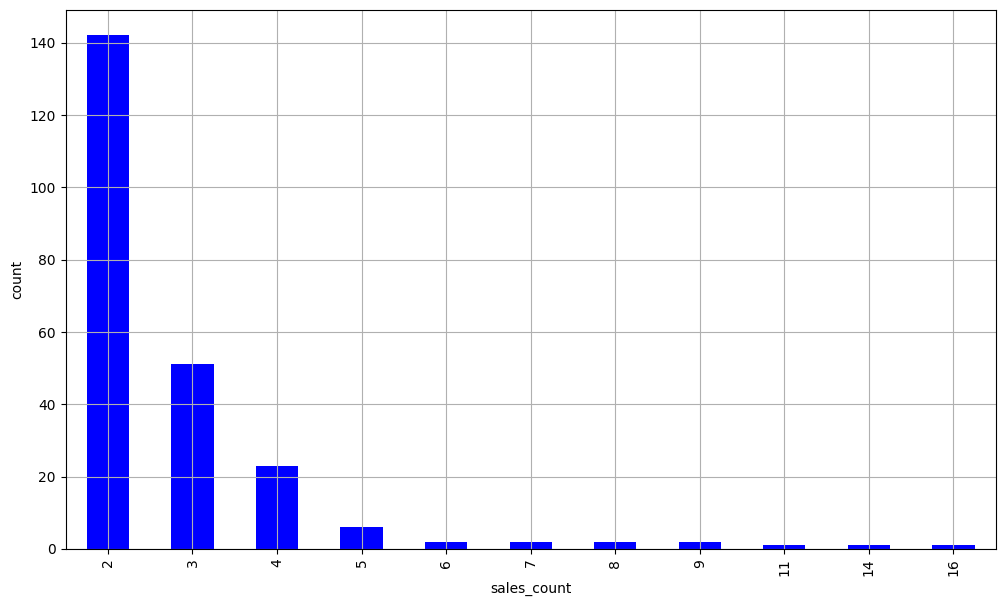

In [334]:
# We filter on invoicedate_purchase_duration greater than 0
summary_df_bd = summary_df_bd.loc[summary_df_bd['invoicedate_purchase_duration'] >= 0]

ax = summary_df_bd.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='blue',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

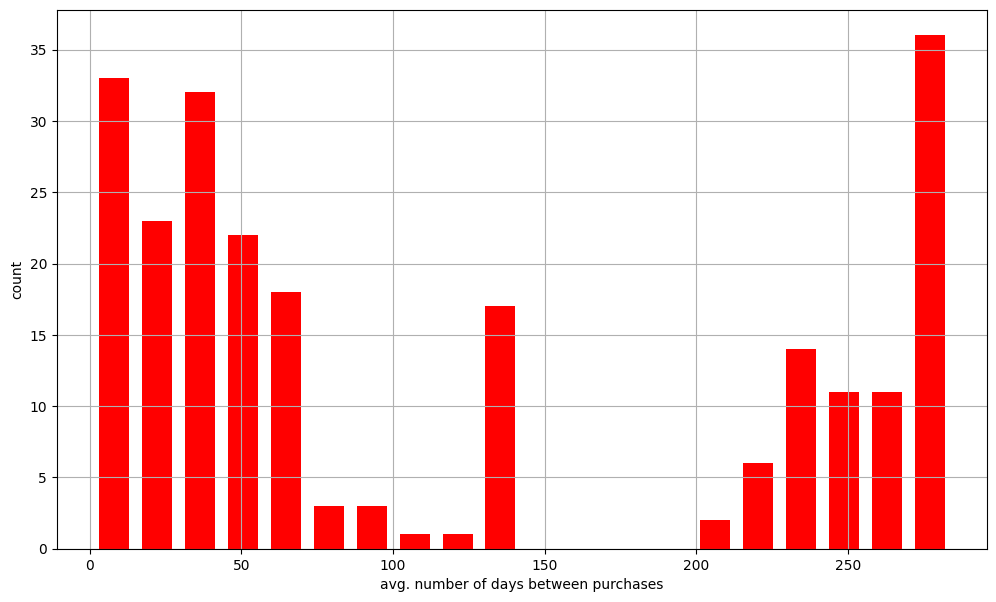

In [335]:
# Now we create a distribution for the average times between sales
ax = summary_df_bd['invoicedate_purchase_duration'].hist(bins=20, color='red', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# Predicting the 3 month Customer Lifetime Value

In [336]:
orders_df_bd.head()

Sales         InvoiceDate
CustomerID InvoiceNo                                
12347.0    537626       334620.0 2020-12-07 14:57:00
           542237       291720.0 2021-01-26 14:30:00
12348.0    539318       566280.0 2020-12-16 19:09:00
12354.0    550911     15435420.0 2021-04-21 13:11:00
12356.0    541430       715000.0 2021-01-18 09:50:00

In [362]:
# Create summary statistics in 3 month intervals for customer Sales

# Use 3M for 3 month
clv_freq = '3M'

# Groupby customer ID now, and group all invoices for 3 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_df_bd.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12347.0,2020-12-31,334620.0,334620.0,1
1,12347.0,2021-03-31,291720.0,291720.0,1
2,12348.0,2020-12-31,566280.0,566280.0,1
3,12354.0,2021-06-30,15435420.0,15435420.0,1
4,12356.0,2021-03-31,715000.0,715000.0,1


In [338]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12347.0,2020-12-31,334620.0,334620.0,1,M_4
1,12347.0,2021-03-31,291720.0,291720.0,1,M_3
2,12348.0,2020-12-31,566280.0,566280.0,1,M_4
3,12354.0,2021-06-30,15435420.0,15435420.0,1,M_2
4,12356.0,2021-03-31,715000.0,715000.0,1,M_3


In [339]:
data_df['M'].unique()

array(['M_4', 'M_3', 'M_2', 'M_1'], dtype=object)

**RFM**

By definition, RFM represents:

- R(ecency): how recently did customer purchase?
- F(rquency): how often do customer purchase?
- M(onetary Value): how much do they spend (each time on average)?

In [340]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4
CustomerID,,,,,,,,,
12347.0,NaN,291720.0,334620.0,NaN,1.0,1.0,NaN,291720.0,334620.0
12348.0,NaN,NaN,566280.0,NaN,NaN,1.0,NaN,NaN,566280.0
12354.0,15435420.0,NaN,NaN,1.0,NaN,NaN,15435420.0,NaN,NaN
12356.0,NaN,715000.0,NaN,NaN,1.0,NaN,NaN,715000.0,NaN
12359.0,NaN,486200.0,NaN,NaN,1.0,NaN,NaN,486200.0,NaN


In [341]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_3M
18,12433.0,37295973.0
21,12449.0,15554110.0
30,12477.0,-1332474.0
40,12535.0,4932070.0
56,12621.0,-798655.0


In [342]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,CustomerID,CLV_3M
NaN,0.0,291720.0,334620.0,0.0,1.0,1.0,0.0,291720.0,334620.0,12347.0,0.0
NaN,0.0,0.0,566280.0,0.0,0.0,1.0,0.0,0.0,566280.0,12348.0,0.0
NaN,15435420.0,0.0,0.0,1.0,0.0,0.0,15435420.0,0.0,0.0,12354.0,0.0
NaN,0.0,715000.0,0.0,0.0,1.0,0.0,0.0,715000.0,0.0,12356.0,0.0
NaN,0.0,486200.0,0.0,0.0,1.0,0.0,0.0,486200.0,0.0,12359.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
NaN,0.0,0.0,1226940.0,0.0,0.0,1.0,0.0,0.0,1226940.0,18229.0,0.0
NaN,0.0,373230.0,0.0,0.0,1.0,0.0,0.0,373230.0,0.0,18239.0,0.0
NaN,0.0,181610.0,0.0,0.0,1.0,0.0,0.0,181610.0,0.0,18250.0,0.0
NaN,0.0,-19090.5,0.0,0.0,2.0,0.0,0.0,-38181.0,0.0,18260.0,0.0


In [343]:
sample_set_df.shape

(752, 11)

# Predicting the 4 month Customer Lifetime Value


In [344]:
orders_df_bd.head()

Sales         InvoiceDate
CustomerID InvoiceNo                                
12347.0    537626       334620.0 2020-12-07 14:57:00
           542237       291720.0 2021-01-26 14:30:00
12348.0    539318       566280.0 2020-12-16 19:09:00
12354.0    550911     15435420.0 2021-04-21 13:11:00
12356.0    541430       715000.0 2021-01-18 09:50:00

In [345]:
# Create summary statistics in 4 month intervals for customer Sales

# Use 4M for 4 month
clv_freq = '4M'

# Groupby customer ID now, and group all invoices for 4 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_df_bd.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12347.0,2020-12-31,334620.0,334620.0,1
1,12347.0,2021-04-30,291720.0,291720.0,1
2,12348.0,2020-12-31,566280.0,566280.0,1
3,12354.0,2021-04-30,15435420.0,15435420.0,1
4,12356.0,2021-04-30,715000.0,715000.0,1


In [346]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12347.0,2020-12-31,334620.0,334620.0,1,M_3
1,12347.0,2021-04-30,291720.0,291720.0,1,M_2
2,12348.0,2020-12-31,566280.0,566280.0,1,M_3
3,12354.0,2021-04-30,15435420.0,15435420.0,1,M_2
4,12356.0,2021-04-30,715000.0,715000.0,1,M_2


In [347]:
data_df['M'].unique()

array(['M_3', 'M_2', 'M_1'], dtype=object)

In [348]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3
CustomerID,,,,,,
12347.0,291720.0,334620.0,1.0,1.0,291720.0,334620.0
12348.0,NaN,566280.0,NaN,1.0,NaN,566280.0
12354.0,15435420.0,NaN,1.0,NaN,15435420.0,NaN
12356.0,715000.0,NaN,1.0,NaN,715000.0,NaN
12359.0,486200.0,NaN,1.0,NaN,486200.0,NaN


In [349]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_4M
18,12433.0,37295973.0
21,12449.0,15554110.0
30,12477.0,-1332474.0
40,12535.0,4932070.0
56,12621.0,-798655.0


In [350]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3,CustomerID,CLV_4M
NaN,291720.0,334620.0,1.0,1.0,291720.0,334620.0,12347.0,0.0
NaN,0.0,566280.0,0.0,1.0,0.0,566280.0,12348.0,0.0
NaN,15435420.0,0.0,1.0,0.0,15435420.0,0.0,12354.0,0.0
NaN,715000.0,0.0,1.0,0.0,715000.0,0.0,12356.0,0.0
NaN,486200.0,0.0,1.0,0.0,486200.0,0.0,12359.0,0.0
...,...,...,...,...,...,...,...,...
NaN,0.0,1226940.0,0.0,1.0,0.0,1226940.0,18229.0,0.0
NaN,373230.0,0.0,1.0,0.0,373230.0,0.0,18239.0,0.0
NaN,181610.0,0.0,1.0,0.0,181610.0,0.0,18250.0,0.0
NaN,-19090.5,0.0,2.0,0.0,-38181.0,0.0,18260.0,0.0


In [351]:
sample_set_df.shape

(752, 8)

# Using Linear Regression

In [352]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CUSTID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [353]:
# Get our y intercept
reg_fit.intercept_

24520.196239561425

In [354]:
# Get our coefficents
reg_fit.coef_

array([ 3.10189297e-01, -2.56300170e-01,  3.54454320e+05,  8.17688956e+05,
       -1.39509474e-01,  5.89391866e-02, -4.38143422e+00])

In [355]:
# Show them here per feature
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,0.310189
1,sales_avg_M_3,-0.256300
2,sales_count_M_2,354454.319659
3,sales_count_M_3,817688.955747
4,sales_sum_M_2,-0.139509
5,sales_sum_M_3,0.058939
6,CustomerID,-4.381434


In [356]:
# Run our input data into our model predictors
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [357]:
# Assess performance Training Data
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.031156147430057457
717770.8824589555


In [358]:
# Compare R-Squared Performance on Training and Test Datasets
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.0312
Out-of-Sample R-Squared: -0.0141


In [359]:
# Compare MSE on Training and Test Datasets
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 717770.8825
Out-of-Sample MSE: 712624.1654


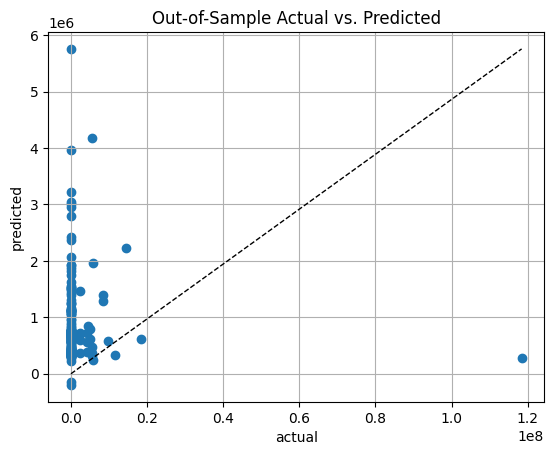

In [360]:
# Plot the predicted vs actual values using our Test Dataset
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='black', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()